In [0]:
import torch
import torch.nn as nn

import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math
# Importing the most popular regression libraries.
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# import os
# print(os.listdir("../input"))
#pd.read_csv("../input/sales data-set.csv")

In [0]:
#loading data
feature = pd.read_csv('datasets_2296_3883_Features_dataset.csv')
store = pd.read_csv('datasets_2296_3883_stores data-set.csv')
sales = pd.read_csv('sales data-set.csv')

In [44]:
#merge all files in one data frame
data = sales.merge(feature, how = 'left', on=['Store', 'Date', 'IsHoliday'])
data = data.merge(store,how= "left", on=['Store'])
#print(len(data.columns))
#print(data.shape)

(421570, 16)


In [39]:
num_store = store.Type.value_counts()
print(num_store) # A has highest number of stores

A    22
B    17
C     6
Name: Type, dtype: int64


In [43]:
holiday = data.IsHoliday.value_counts()
print(holiday)

False    391909
True      29661
Name: IsHoliday, dtype: int64


In [96]:
#preprocessing
data=data.fillna(0)
#data.isna().sum()  #check for any NaN

print((data.Weekly_Sales<0).any())  #negative value in weekly sales
#ignore negative ones
data = data[data.Weekly_Sales>0]
print((data.Weekly_Sales<0).any())
print(data.shape)

#is there ant duplicate row
print(data.duplicated().sum())

#IsHoliday 0,1
data.IsHoliday = data.IsHoliday.replace({True: 1, False: 0})

#Type 1,2,3
data.Type = data.Type.replace({"A": 1, "B": 2, "C": 3})

data[:5]

False
False
(420212, 16)
0


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315
1,1,1,12/02/2010,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315
2,1,1,19/02/2010,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,151315
3,1,1,26/02/2010,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,151315
4,1,1,05/03/2010,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,151315


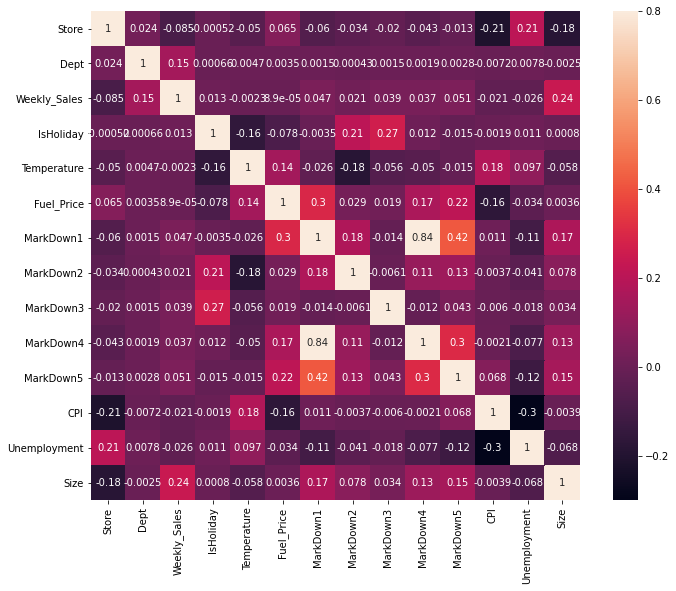

In [81]:
#correlation matrix
cor_matrix = data.corr()
cor_matrix

#As we see MarkDown 4 and MarkDown1 are high correlated
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(cor_matrix, vmax=.8, square=True, annot=True)
#plt.show()



In [0]:
data = data.sort_values(by='Date', ascending=True)

#splitting the data into train, validation, test
y = data['Weekly_Sales']
x = data.drop(['Weekly_Sales'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3) 


In [0]:
#weighted holidays
def WMSE (X, Y, pred):
  weight = x.IsHoliday.apply(lambda holiday:5 if holiday else 1)
  return np.sum(weight * np.square(Y - pred), axis = 0) / np.sum(weight)
  

In [115]:
pd.to_datetime(data['Date'])[:5]

feature selction
window
CNN, CNN_LSTM



141436   2011-01-04
233709   2011-01-04
183762   2011-01-04
234831   2011-01-04
179392   2011-01-04
Name: Date, dtype: datetime64[ns]